# Section 3: Acquiring Different Types of Data from OSM

In [66]:
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [67]:
import geopandas as gpd

In [68]:
point = Point(0,0)
line = LineString([(0,1), (-2,4), (7,20),(15,3)])
polygon = Polygon([(1,-1),(-3,2),(5,21),(14,0)])

multipoint = MultiPoint([Point(0,1), Point(1,3), Point(3,3)])
multiline = MultiLineString([
    LineString([(1,1),(-3,5),(2,23),(10,2)]),
    LineString([(0,1),(-2,4),(7,20),(15,3)])
])

polygon1 = Polygon([(-5,4),(5,9),(3,15)])
polygon2 = Polygon([(4,5),(8,4),(7,7)])
polygon3 = Polygon([(-3,-3), (4,3), (-10,10)])
multipolygon = MultiPolygon([polygon1, polygon2,polygon3])

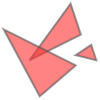

In [69]:
multipolygon

In [70]:
geometry_data = {}
geometry_data['point'] = point
geometry_data['line'] = line
geometry_data['polygon'] = polygon

geometry_data['multipoint'] = multipoint
geometry_data['multiline'] = multiline 
geometry_data['multipolygon'] = multipolygon

geometry_data 

{'point': <POINT (0 0)>,
 'line': <LINESTRING (0 1, -2 4, 7 20, 15 3)>,
 'polygon': <POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))>,
 'multipoint': <MULTIPOINT (0 1, 1 3, 3 3)>,
 'multiline': <MULTILINESTRING ((1 1, -3 5, 2 23, 10 2), (0 1, -2 4, 7 20, 15 3))>,
 'multipolygon': <MULTIPOLYGON (((-5 4, 5 9, 3 15, -5 4)), ((4 5, 8 4, 7 7, 4 5)), ((-3 -3, 4...>}

## Create GeoDataFrame

In [71]:
gdf = gpd.GeoDataFrame(geometry_data.items(), columns = ['geom_type', 'geometry'])
gdf

,geom_type,geometry
0,point,POINT (0 0)
1,line,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
2,polygon,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))"
3,multipoint,"MULTIPOINT (0 1, 1 3, 3 3)"
4,multiline,"MULTILINESTRING ((1 1, -3 5, 2 23, 10 2), (0 1..."
5,multipolygon,"MULTIPOLYGON (((-5 4, 5 9, 3 15, -5 4)), ((4 5..."


In [72]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

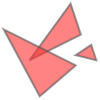

In [73]:
gdf.geometry.to_list()[-1]

## Visualizing a GeoDataFrame

<Axes: >

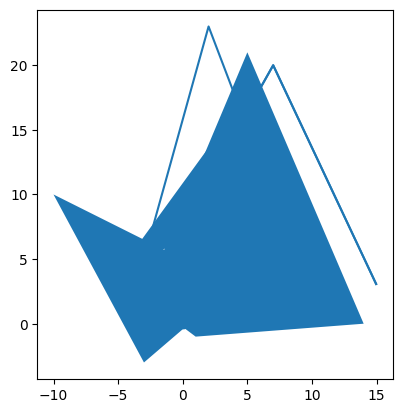

In [74]:
gdf.plot()

<Axes: >

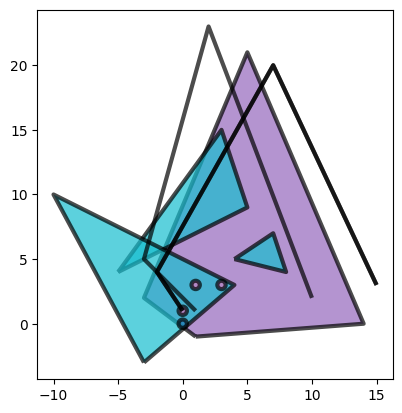

In [75]:
gdf.plot(edgecolor = 'k', linewidth = 3, cmap = 'tab10', alpha = 0.7 ) #alpha is transparency

## Basic features of a GDF

In [76]:
gdf

,geom_type,geometry
0,point,POINT (0 0)
1,line,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
2,polygon,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))"
3,multipoint,"MULTIPOINT (0 1, 1 3, 3 3)"
4,multiline,"MULTILINESTRING ((1 1, -3 5, 2 23, 10 2), (0 1..."
5,multipolygon,"MULTIPOLYGON (((-5 4, 5 9, 3 15, -5 4)), ((4 5..."


In [77]:
gdf['perimeter'] = gdf.geometry.apply(lambda x: x.length)
gdf

,geom_type,geometry,perimeter
0,point,POINT (0 0),0.000000
1,line,"LINESTRING (0 1, -2 4, 7 20, 15 3)",40.751405
2,polygon,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))",61.501252
3,multipoint,"MULTIPOINT (0 1, 1 3, 3 3)",0.000000
4,multiline,"MULTILINESTRING ((1 1, -3 5, 2 23, 10 2), (0 1...",87.562006
5,multipolygon,"MULTIPOLYGON (((-5 4, 5 9, 3 15, -5 4)), ((4 5...",81.634144


In [78]:
gdf['area'] = gdf.geometry.apply(lambda x: x.area)
gdf

,geom_type,geometry,perimeter,area
0,point,POINT (0 0),0.000000,0.0
1,line,"LINESTRING (0 1, -2 4, 7 20, 15 3)",40.751405,0.0
2,polygon,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))",61.501252,191.0
3,multipoint,"MULTIPOINT (0 1, 1 3, 3 3)",0.000000,0.0
4,multiline,"MULTILINESTRING ((1 1, -3 5, 2 23, 10 2), (0 1...",87.562006,0.0
5,multipolygon,"MULTIPOLYGON (((-5 4, 5 9, 3 15, -5 4)), ((4 5...",81.634144,107.0


<Axes: >

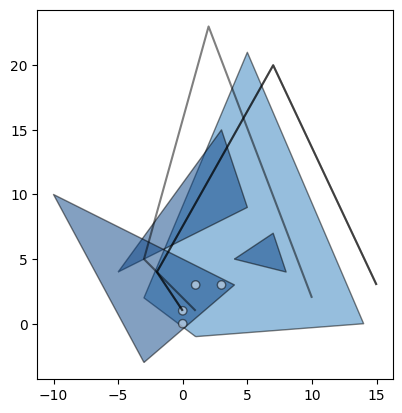

In [79]:
gdf.plot(column = 'perimeter', edgecolor ='k', cmap ='Blues', alpha = 0.5)

### Explosion:
- all multipolygon and other could be split into differrent compounds (?) (like seperate into different data record)

In [80]:
gdf_e = gdf.explode()
gdf_e

,geom_type,perimeter,area,geometry
0,point,0.000000,0.0,POINT (0 0)
1,line,40.751405,0.0,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
2,polygon,61.501252,191.0,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))"
3,multipoint,0.000000,0.0,POINT (0 1)
3,multipoint,0.000000,0.0,POINT (1 3)
3,multipoint,0.000000,0.0,POINT (3 3)
4,multiline,87.562006,0.0,"LINESTRING (1 1, -3 5, 2 23, 10 2)"
4,multiline,87.562006,0.0,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
5,multipolygon,81.634144,107.0,"POLYGON ((-5 4, 5 9, 3 15, -5 4))"
5,multipolygon,81.634144,107.0,"POLYGON ((4 5, 8 4, 7 7, 4 5))"


In [81]:
gdf_e['perimeter'] = gdf_e.geometry.apply(lambda x: x.length)
gdf_e['area'] = gdf_e.geometry.apply(lambda x: x.area)
gdf_e

,geom_type,perimeter,area,geometry
0,point,0.000000,0.0,POINT (0 0)
1,line,40.751405,0.0,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
2,polygon,61.501252,191.0,"POLYGON ((1 -1, -3 2, 5 21, 14 0, 1 -1))"
3,multipoint,0.000000,0.0,POINT (0 1)
3,multipoint,0.000000,0.0,POINT (1 3)
3,multipoint,0.000000,0.0,POINT (3 3)
4,multiline,46.810601,0.0,"LINESTRING (1 1, -3 5, 2 23, 10 2)"
4,multiline,40.751405,0.0,"LINESTRING (0 1, -2 4, 7 20, 15 3)"
5,multipolygon,31.106366,35.0,"POLYGON ((-5 4, 5 9, 3 15, -5 4))"
5,multipolygon,10.890935,5.5,"POLYGON ((4 5, 8 4, 7 7, 4 5))"


<Axes: >

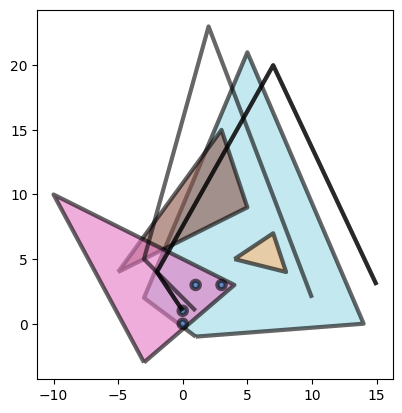

In [82]:
gdf_e.plot(column = 'perimeter', edgecolor = "k", linewidth = 3, cmap= 'tab20', alpha= 0.6)

In [83]:
# Check to know other useful function
dir(gdf_e)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos

## Acquiring Point data with the OverPass API

In [84]:
import overpy

In [85]:
## First look at the API

miny = 47.48
minx = 19.04
maxy = 47.51
maxx= 19.06

bbox = ','.join([str(miny), str(minx), str(maxy), str(maxx)])
bbox

'47.48,19.04,47.51,19.06'

In [86]:
amenity_category = 'amenity'
amenity_name = 'cafe'

In [87]:
api = overpy.Overpass()
query = f"""node["{amenity_category}" = "{amenity_name}"]({bbox});out; """
query

'node["amenity" = "cafe"](47.48,19.04,47.51,19.06);out; '

In [88]:
result = api.query(query)
result

In [89]:
result.nodes[0]

<overpy.Node id=260896310 lat=47.5022714 lon=19.0528557>

In [90]:
dir(result.nodes[0])

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_result',
 '_type_value',
 'attributes',
 'from_json',
 'from_xml',
 'get_center_from_json',
 'get_center_from_xml_dom',
 'id',
 'lat',
 'lon',
 'tags']

In [91]:
result.nodes[0].tags

{'addr:city': 'Budapest',
 'addr:housenumber': '15',
 'addr:postcode': '1051',
 'addr:street': 'Hercegprímás utca',
 'amenity': 'cafe',
 'capacity': '67',
 'check_date:opening_hours': '2024-07-11',
 'contact:email': 'tanya@cookiebeacon.com',
 'contact:facebook': '100075998267990',
 'contact:foursquare': '61bafb4fff6d024d5fd1d802',
 'contact:phone': '+36 30 688 9438',
 'contact:tripadvisor': '23806050',
 'contact:website': 'https://www.cookiebeacon.com/',
 'name': 'Cookie Beacon',
 'opening_hours': 'Mo-Fr 08:00-17:00; Sa,Su 09:00-17:00',
 'operator': 'Spangary Investments Kft.',
 'ref:google': '/g/11pkhq9tsf',
 'short_name': 'Café Vian',
 'toilets:wheelchair': 'no',
 'wheelchair': 'no'}

## Download multiple types of points

In [92]:
amenity_list = [('amenity','cafe'),
                ('amenity', 'pub'),
                ('tourism', 'gallery'),
                ('sport', 'yoga')]

poi_data =[]

for amenity_cat, amenity in amenity_list:
    query = f"""node["{amenity_cat}"="{amenity}"]({bbox});out;"""
    result = api.query(query)

    print(query)

    for node in result.nodes:
        data ={}
        
        data['name'] = node.tags.get('name', 'N/A')
        data['amenity'] = amenity_cat + '__' + amenity 
        data['geometry'] = Point(node.lon, node.lat)
        poi_data.append(data)
 

node["amenity"="cafe"](47.48,19.04,47.51,19.06);out;
node["amenity"="pub"](47.48,19.04,47.51,19.06);out;
node["tourism"="gallery"](47.48,19.04,47.51,19.06);out;
node["sport"="yoga"](47.48,19.04,47.51,19.06);out;


In [93]:
poi_data

[{'name': 'Cookie Beacon',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.053 47.502)>},
 {'name': 'N/A',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.053 47.505)>},
 {'name': 'Szamos Today',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.048 47.506)>},
 {'name': 'À la Maison',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.053 47.495)>},
 {'name': 'Vaj',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.052 47.499)>},
 {'name': 'Strudli',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.053 47.5)>},
 {'name': 'Apostolok-Jégbüfé',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.054 47.493)>},
 {'name': 'Green House Cafe Brunch & Bar',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.055 47.505)>},
 {'name': 'Panna Cafe',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.054 47.508)>},
 {'name': 'EzAz Café',
  'amenity': 'amenity__cafe',
  'geometry': <POINT (19.055 47.501)>},
 {'name': 'István Cukrászda',
  'amenity': 'amen

In [94]:
gdf = gpd.GeoDataFrame(poi_data)
gdf

,name,amenity,geometry
0,Cookie Beacon,amenity__cafe,POINT (19.05286 47.50227)
1,N/A,amenity__cafe,POINT (19.05319 47.50453)
2,Szamos Today,amenity__cafe,POINT (19.04784 47.50558)
3,À la Maison,amenity__cafe,POINT (19.05268 47.49536)
4,Vaj,amenity__cafe,POINT (19.05225 47.49916)
...,...,...,...
301,Rechnitzer Galéria,tourism__gallery,POINT (19.0517 47.50486)
302,Kolta Galéria,tourism__gallery,POINT (19.0582 47.49451)
303,Downdog joga,sport__yoga,POINT (19.05127 47.48056)
304,Fehér Főnix Sótér,sport__yoga,POINT (19.05135 47.50735)


<Axes: >

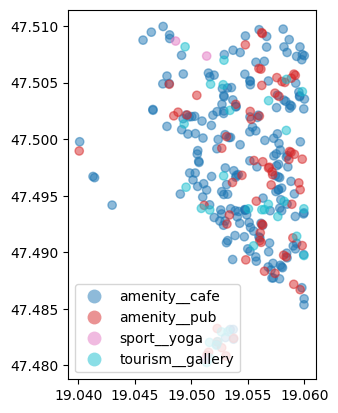

In [95]:
gdf.plot(column = 'amenity', cmap='tab10', alpha = 0.5, legend=True)

## OSMX

In [96]:
import osmnx as ox

### Collecting POIs

In [97]:
cafes = ox.features_from_place('5th District, Budapest', tags ={'amenity':'cafe'})
cafes

geometry addr:city addr:housenumber  \
element id                                                                  
node    260896310    POINT (19.05286 47.50227)  Budapest               15   
        263984860    POINT (19.05319 47.50453)  Budapest                1   
        263988027    POINT (19.04784 47.50558)  Budapest               10   
        264117979    POINT (19.05268 47.49536)  Budapest                3   
        264126505    POINT (19.05225 47.49916)  Budapest                2   
...                                        ...       ...              ...   
        12213840001  POINT (19.05712 47.48773)       NaN              NaN   
        12254795392  POINT (19.06073 47.49246)       NaN              NaN   
        12318433084  POINT (19.05992 47.49339)       NaN              NaN   
        12364319615  POINT (19.05177 47.50122)  Budapest               14   
        12477932208  POINT (19.05634 47.49479)       NaN              NaN   

                    addr:postcode             addr:street amenity capacity  \
element id                                                                   
node    260896310            1051       Hercegprímás utca    cafe       67   
        263984860            1054  Nagysándor József utca    cafe      NaN   
        263988027            1055       Kossuth Lajos tér    cafe       50   
        264117979            1052            Szervita tér    cafe      116   
        264126505            1051                Sas utca    cafe      NaN   
...                           ...                     ...     ...      ...   
        12213840001           NaN                     NaN    cafe      NaN   
        12254795392           NaN                     NaN    cafe      NaN   
        12318433084           NaN                     NaN    cafe      NaN   
        12364319615          1051                Sas utca    cafe      NaN   
        12477932208           NaN                     NaN    cafe      NaN   

                    check_date:opening_hours              contact:email  \
element id                                                                
node    260896310                 2024-07-11     tanya@cookiebeacon.com   
        263984860                        NaN                        NaN   
        263988027                        NaN   parlament.cafe@szamos.hu   
        264117979                        NaN  info@alamaisonbudapest.hu   
        264126505                        NaN                        NaN   
...                                      ...                        ...   
        12213840001                      NaN                        NaN   
        12254795392                      NaN                        NaN   
        12318433084                      NaN                        NaN   
        12364319615                      NaN                        NaN   
        12477932208                      NaN                        NaN   

                     contact:facebook  ... reservation phone diet:gluten_free  \
element id                             ...                                      
node    260896310     100075998267990  ...         NaN   NaN              NaN   
        263984860                 NaN  ...         NaN   NaN              NaN   
        263988027    1798015517077059  ...         NaN   NaN              NaN   
        264117979     330614540479174  ...         NaN   NaN              NaN   
        264126505                 NaN  ...         NaN   NaN              NaN   
...                               ...  ...         ...   ...              ...   
        12213840001               NaN  ...         NaN   NaN              NaN   
        12254795392               NaN  ...         NaN   NaN              NaN   
        12318433084               NaN  ...         NaN   NaN              NaN   
        12364319615               NaN  ...         NaN   NaN              NaN   
        12477932208               NaN  ...         NaN   NaN             

In [98]:
len(cafes)

151

In [99]:
poi_tags = {
    "amenity": ["cafe", "pub","restaurant"],
    "tourism": ["gallery"],
    "sport": ["yoga"]
}

poi_tags

{'amenity': ['cafe', 'pub', 'restaurant'],
 'tourism': ['gallery'],
 'sport': ['yoga']}

In [100]:
pois = ox.features_from_place('5th District, Budapest', tags = poi_tags)

In [101]:
pois

geometry  \
element  id                                                               
node     260886170                            POINT (19.04829 47.50185)   
         260886171                             POINT (19.0496 47.50195)   
         260892267                            POINT (19.05292 47.50099)   
         260896309                             POINT (19.0506 47.50205)   
         260896310                            POINT (19.05286 47.50227)   
...                                                                 ...   
         12487906320                           POINT (19.0582 47.49451)   
         12522416552                          POINT (19.05283 47.49575)   
         12541238172                          POINT (19.04867 47.51156)   
relation 3251841      POLYGON ((19.04786 47.50218, 19.04805 47.5022,...   
way      25366836     POLYGON ((19.04704 47.49662, 19.04706 47.49664...   

                     addr:city addr:housenumber addr:postcode  \
element  id                                                     
node     260886170    Budapest                9          1051   
         260886171    Budapest               13          1051   
         260892267    Budapest             9-11          1051   
         260896309    Budapest               17          1051   
         260896310    Budapest               15          1051   
...                        ...              ...           ...   
         12487906320       NaN              NaN           NaN   
         12522416552       NaN              NaN           NaN   
         12541238172       NaN              NaN           NaN   
relation 3251841      Budapest               10          1051   
way      25366836     Budapest              NaN          1051   

                            addr:street           amenity capacity  \
element  id                                                          
node     260886170     Arany János utca        restaurant      180   
         260886171     Arany János utca        restaurant       30   
         260892267     Szent István tér        restaurant      201   
         260896309     Arany János utca        restaurant       90   
         260896310    Hercegprímás utca              cafe       67   
...                                 ...               ...      ...   
         12487906320                NaN               NaN      NaN   
         12522416552                NaN        restaurant      NaN   
         12541238172                NaN               NaN      NaN   
relation 3251841       Arany János utca  community_centre      NaN   
way      25366836                   NaN        restaurant      NaN   

                                  contact:email    contact:facebook  \
element  id                                                           
node     260886170    info@pomodorobudapest.com     261870503850168   
         260886171        quibudapest@gmail.com     100063937059908   
         260892267              hello@bestia.hu     653929851379045   
         260896309       info@mythosthegreek.hu     536386290171019   
         260896310       tanya@cookiebeacon.com     100075998267990   
...                                         ...                 ...   
         12487906320                        NaN                 NaN   
         12522416552                        NaN                 NaN   
         12541238172                        NaN                 NaN   
relation 3251841           aranytiz@aranytiz.hu  aranytiz.kulturhaz   
way      25366836            sales@spoonboat.hu        spoontheboat   

                            contact:foursquare  ...  bar step_count leisure  \
element  id                                     ...                           
node     260886170    4f44cf57e4b093577fc6710f  ...  NaN        NaN     NaN   
         260886171    5f0da1cdfcc0346a3413f7f2  ...  NaN        NaN     NaN   
         260892267    55427fd1498ecd5cf6ddf365  ...  NaN        NaN     NaN   
         26

<Axes: >

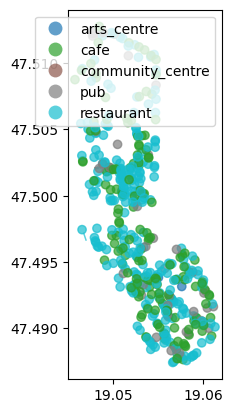

In [102]:
pois.plot(column = 'amenity', legend = True, alpha = 0.7)

### Downloading polygons
The different units of each geo

<Axes: >

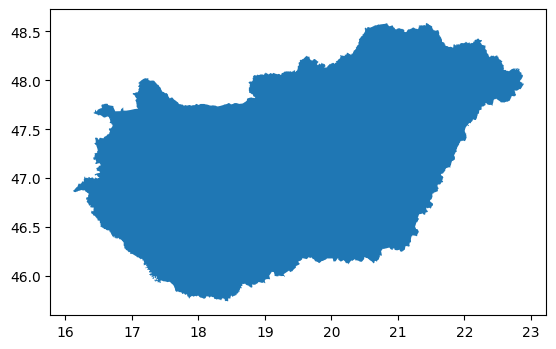

In [103]:
admin_country = ox.geocode_to_gdf('Hungary')
admin_country.plot()

<Axes: >

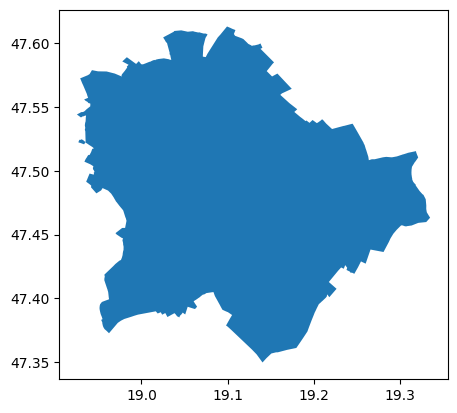

In [104]:
admin_city = ox.geocode_to_gdf("Budapest")
admin_city.plot()

<Axes: >

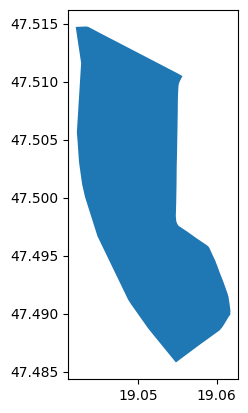

In [105]:
admin_district = ox.geocode_to_gdf('5th district, Budapest')
admin_district.plot()

### Combine visualizations

In [106]:
import matplotlib.pyplot as plt

In [107]:
import pandas as pd

In [108]:
admin = pd.concat([admin_country,admin_city,admin_district])
admin

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((16.11389 46.86906, 16.11522 46.86779...",16.113887,45.737128,22.897709,48.585257,59146440,relation,21335,47.181759,19.506094,boundary,administrative,4,0.864874,country,Hungary,Hungary
0,"POLYGON ((18.92511 47.54414, 18.92979 47.54183...",18.925106,47.349690,19.334926,47.613147,58794709,relation,37244,47.481390,19.146094,boundary,administrative,12,0.795423,region,Budapest,"Budapest, Central Hungary, Hungary"
0,"POLYGON ((19.04202 47.51471, 19.04263 47.51199...",19.042022,47.485786,19.061762,47.514747,59656504,relation,1606103,47.499945,19.050549,boundary,administrative,18,0.471170,borough,5th district,"5th district, Budapest, Central Hungary, Hungary"


<Axes: >

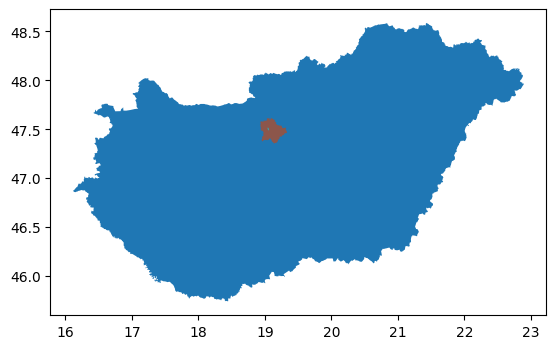

In [109]:
admin.plot(cmap='tab10')

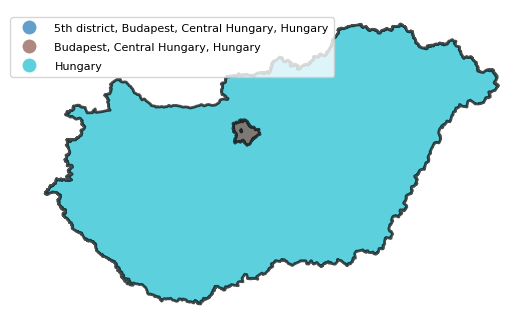

In [110]:
f, ax = plt.subplots(1,1,figsize=(7,4))

admin.plot(column = 'display_name',alpha=0.7, ax=ax, edgecolor='k',linewidth=2,legend=True)



# legend = ax.legend()
# legend.set_bbox_to_anchor((0.64,1.0))
# legend.set_bbox_to_anchor((0.6,1.0))

# for text in legend.get_texts():
#     text.set_fontsize(8)

# ax.axis('off')

legend = ax.get_legend()
legend.set_bbox_to_anchor((0.64,1.0))

for text in legend.get_texts():
    text.set_fontsize(8)

ax.axis('off')

plt.show()


In [111]:
admin

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((16.11389 46.86906, 16.11522 46.86779...",16.113887,45.737128,22.897709,48.585257,59146440,relation,21335,47.181759,19.506094,boundary,administrative,4,0.864874,country,Hungary,Hungary
0,"POLYGON ((18.92511 47.54414, 18.92979 47.54183...",18.925106,47.349690,19.334926,47.613147,58794709,relation,37244,47.481390,19.146094,boundary,administrative,12,0.795423,region,Budapest,"Budapest, Central Hungary, Hungary"
0,"POLYGON ((19.04202 47.51471, 19.04263 47.51199...",19.042022,47.485786,19.061762,47.514747,59656504,relation,1606103,47.499945,19.050549,boundary,administrative,18,0.471170,borough,5th district,"5th district, Budapest, Central Hungary, Hungary"


### Acquiring Polygon-level Urban features

#### Data collection

<Axes: >

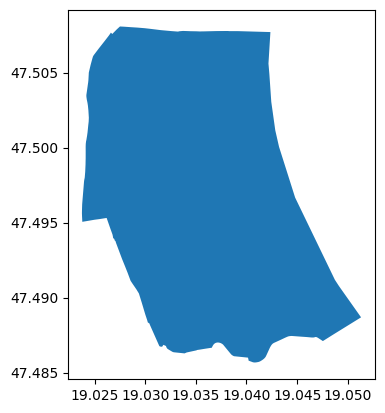

In [112]:
admin_district =ox.geocode_to_gdf('1st district, Budapest')
admin_district.plot()

In [113]:
admin_poly = admin_district.geometry.values[0]
type(admin_poly)

shapely.geometry.polygon.Polygon

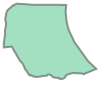

In [114]:
admin_poly

In [115]:
parks = ox.features_from_polygon(admin_poly, tags = {'leisure': 'park'})
len(parks)
parks.head()

geometry layer  \
element  id                                                                  
relation 3928328   POLYGON ((19.03354 47.5046, 19.03368 47.50486,...   NaN   
         6677850   POLYGON ((19.03432 47.50153, 19.03484 47.50165...   NaN   
         12841566  POLYGON ((19.03056 47.50541, 19.03069 47.50542...   NaN   
         14455125  POLYGON ((19.03694 47.49939, 19.03691 47.49953...   NaN   
         14455126  POLYGON ((19.03994 47.49774, 19.03997 47.49775...   NaN   

                  leisure          name name:de wikidata  \
element  id                                                
relation 3928328     park           NaN     NaN      NaN   
         6677850     park           NaN     NaN      NaN   
         12841566    park  Európa liget     NaN  Q993028   
         14455125    park           NaN     NaN      NaN   
         14455126    park           NaN     NaN      NaN   

                       wikimedia_commons        wikipedia access operator  \
element  id                                                                 
relation 3928328                     NaN              NaN    NaN      NaN   
         6677850                     NaN              NaN    NaN      NaN   
         12841566  Category:Európa Liget  hu:Európa Liget    NaN      NaN   
         14455125                    NaN              NaN    NaN      NaN   
         14455126                    NaN              NaN    NaN      NaN   

                   ... source:name source language:eo name:en name:eo  \
element  id        ...                                                  
relation 3928328   ...         NaN    NaN         NaN     NaN     NaN   
         6677850   ...         NaN    NaN         NaN     NaN     NaN   
         12841566  ...         NaN    NaN         NaN     NaN     NaN   
         14455125  ...         NaN    NaN         NaN     NaN     NaN   
         14455126  ...         NaN    NaN         NaN     NaN     NaN   

                  description operator:email operator:phone operator:website  \
element  id                                                                    
relation 3928328          NaN            NaN            NaN              NaN   
         6677850          NaN            NaN            NaN              NaN   
         12841566         NaN            NaN            NaN              NaN   
         14455125         NaN            NaN            NaN              NaN   
         14455126         NaN            NaN            NaN              NaN   

                           type  
element  id                      
relation 3928328   multipolygon  
         6677850   multipolygon  
         12841566  multipolygon  
         14455125  multipolygon  
         14455126  multipolygon  

[5 rows x 29 columns]

(19.022319055, 19.054002245, 47.48283505, 47.50927575)

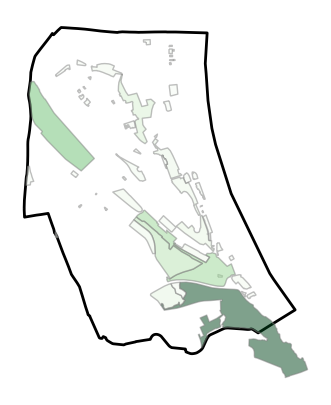

In [116]:
f, ax = plt.subplots(1,1, figsize=(5,5))

admin_district.plot(ax=ax, color ='none', edgecolor="k", linewidth=2)

parks['area'] = parks.geometry.apply(lambda x: x.area)
parks.plot(column='area', ax=ax, cmap='Greens', edgecolor='grey', alpha= 0.5)

ax.axis('off')

In [117]:
footprints = ox.features_from_polygon(admin_poly, tags ={"building": True})

In [118]:
footprints

geometry  \
element  id                                                              
node     737630261                           POINT (19.03142 47.50079)   
relation 165909      POLYGON ((19.03761 47.49904, 19.03754 47.49917...   
         165910      POLYGON ((19.0382 47.49831, 19.03822 47.49826,...   
         165911      POLYGON ((19.03659 47.49876, 19.03649 47.49883...   
         364535      POLYGON ((19.03787 47.50226, 19.03812 47.5023,...   
...                                                                ...   
way      1339440155  POLYGON ((19.0379 47.4935, 19.03796 47.49347, ...   
         1352906099  POLYGON ((19.02764 47.49465, 19.0276 47.49462,...   
         1356219005  POLYGON ((19.03459 47.49122, 19.03443 47.49132...   
         1358114638  POLYGON ((19.02977 47.50104, 19.02954 47.5012,...   
         1358114639  POLYGON ((19.02928 47.50141, 19.0289 47.50168,...   

                    addr:city addr:housenumber addr:postcode  \
element  id                                                    
node     737630261   Budapest              4/C          1012   
relation 165909      Budapest              5-9          1014   
         165910      Budapest              1-2          1014   
         165911      Budapest               17          1014   
         364535      Budapest               13          1011   
...                       ...              ...           ...   
way      1339440155       NaN              NaN           NaN   
         1352906099       NaN              NaN           NaN   
         1356219005       NaN              NaN           NaN   
         1358114638       NaN              NaN           NaN   
         1358114639  Budapest               37          1012   

                          addr:street      building bunker_type  \
element  id                                                       
node     737630261           Lovas út        bunker     medical   
relation 165909          Színház utca           yes         NaN   
         165910      Szent György tér           yes         NaN   
         165911              Dísz tér  construction         NaN   
         364535            Corvin tér           yes         NaN   
...                               ...           ...         ...   
way      1339440155               NaN       service         NaN   
         1352906099               NaN       service         NaN   
         1356219005               NaN       garages         NaN   
         1358114638               NaN           yes         NaN   
         1358114639       Logodi utca   residential         NaN   

                            contact:email                   contact:facebook  \
element  id                                                                    
node     737630261   info@sziklakorhaz.hu  Sziklakorhaz.Hospital.in.the.Rock   
relation 165909                       NaN                                NaN   
         165910                       NaN                                NaN   
         165911                       NaN                                NaN   
         364535                       NaN                                NaN   
...                                   ...                                ...   
way      1339440155                   NaN                                NaN   
         1352906099                   NaN                                NaN   
         1356219005                   NaN                                NaN   
         1358114638                   NaN                                NaN   
         1358114639                   NaN                                NaN   

                     contact:instagram  ... castle_type url:muemlekem  \
element  id                             ...                             
node     737630261   hospitalintherock  ...         NaN           NaN   
relation 165909                    NaN  ...         NaN           NaN   
         165910                    NaN  ...      palace      

(19.02238183, 19.05268397, 47.484550750000004, 47.50919405)

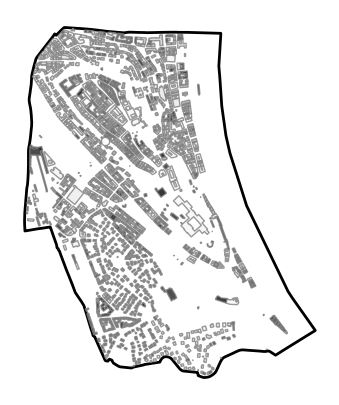

In [119]:
f, ax = plt.subplots(1,1, figsize=(5,5))
admin_district.plot(ax=ax, color='none', edgecolor='k',linewidth=2)
footprints.plot(ax=ax, cmap="Greys", edgecolor='grey',alpha=0.8)
ax.axis("off")

## Acquiring Graph Data

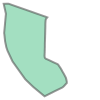

In [151]:
admin_district = ox.geocode_to_gdf('5th district, Budapest')
admin_poly = admin_district.geometry.to_list()[0]
admin_poly

In [142]:
G = ox.graph_from_polygon(admin_poly)
type(G)

networkx.classes.multidigraph.MultiDiGraph

it is graph and directed; so the links, the road segments connecting one intersection to the other have directions, and there are traffic lane on which we can only go in one direction

In [143]:
G = ox.graph_from_polygon(admin_poly, network_type = 'bike') # drive, walk, 'all'

In [144]:
G.number_of_nodes(), G.number_of_edges()

(475, 1006)

### GeoDataFrame

In [145]:
nodes, edges = ox.graph_to_gdfs(G)
nodes

,y,x,street_count,highway,railway,geometry
osmid,,,,,,
26732175,47.500808,19.046259,3,NaN,NaN,POINT (19.04626 47.50081)
26733991,47.499511,19.054845,6,NaN,NaN,POINT (19.05484 47.49951)
35523902,47.499508,19.046416,3,NaN,NaN,POINT (19.04642 47.49951)
49405175,47.499256,19.047012,3,NaN,NaN,POINT (19.04701 47.49926)
49405178,47.498781,19.047210,3,NaN,NaN,POINT (19.04721 47.49878)
...,...,...,...,...,...,...
12506919114,47.513282,19.047628,3,NaN,NaN,POINT (19.04763 47.51328)
12522474371,47.499209,19.054233,3,NaN,NaN,POINT (19.05423 47.49921)
12522682148,47.508344,19.047626,1,NaN,NaN,POINT (19.04763 47.50834)


In [146]:
len(nodes.dropna())

0

In [148]:
nodes = nodes.replace('NaN', pd.NA)
len(nodes.dropna())

0

In [149]:
nodes

,y,x,street_count,highway,railway,geometry
osmid,,,,,,
26732175,47.500808,19.046259,3,NaN,NaN,POINT (19.04626 47.50081)
26733991,47.499511,19.054845,6,NaN,NaN,POINT (19.05484 47.49951)
35523902,47.499508,19.046416,3,NaN,NaN,POINT (19.04642 47.49951)
49405175,47.499256,19.047012,3,NaN,NaN,POINT (19.04701 47.49926)
49405178,47.498781,19.047210,3,NaN,NaN,POINT (19.04721 47.49878)
...,...,...,...,...,...,...
12506919114,47.513282,19.047628,3,NaN,NaN,POINT (19.04763 47.51328)
12522474371,47.499209,19.054233,3,NaN,NaN,POINT (19.05423 47.49921)
12522682148,47.508344,19.047626,1,NaN,NaN,POINT (19.04763 47.50834)


In [150]:
nodes.isin(['NaN']).sum()

y               0
x               0
street_count    0
highway         0
railway         0
geometry        0
dtype: int64

### Questions arise: why NaN cant be found?

In [154]:
edges.keys()

Index(['osmid', 'highway', 'maxspeed', 'name', 'oneway', 'reversed', 'length',
       'lanes', 'service', 'width', 'geometry', 'bridge', 'access', 'ref',
       'tunnel'],
      dtype='object')

In [155]:
edges.highway.to_list()

['residential',
 'service',
 'tertiary',
 'cycleway',
 'secondary',
 'secondary',
 'tertiary',
 'tertiary',
 'tertiary_link',
 'tertiary',
 'tertiary',
 'tertiary_link',
 'tertiary',
 'residential',
 'tertiary',
 'tertiary',
 'tertiary_link',
 'secondary',
 'secondary',
 'residential',
 'residential',
 'residential',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'secondary',
 'residential',
 'pedestrian',
 'residential',
 'residential',
 'residential',
 'residential',
 'residential',
 'residential',
 'pedestrian',
 'tertiary',
 'tertiary',
 'tertiary_link',
 'tertiary',
 'residential',
 'tertiary',
 'residential',
 'tertiary',
 'tertiary',
 'tertiary',
 'tertiary',
 'residential',
 'residential',
 'residential',
 'residential',
 'residential',
 'tertiary',
 'tertiary',
 'secondary_link',
 'residential',
 'residential',
 'service',
 'residential',
 'residential',
 'secondary',
 'residential',
 'residential',
 'residential',
 'resident

### Visualization

(19.04129321, 19.06263739, 47.485507595, 47.516149305)

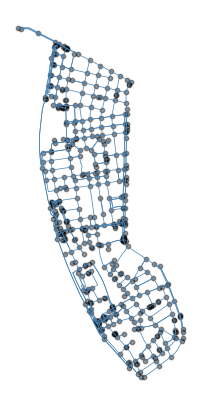

In [157]:
f, ax =plt.subplots(1,1, figsize=(5,5))

nodes.plot(ax=ax, color = 'k', markersize = 10, alpha =0.4)
edges.plot(ax=ax, edgecolor= 'steelblue', linewidth = 0.5 )
ax.axis("off")


# Section 4: Urban Analytics

In [159]:
import contextily as ctx

In [160]:
providers = ctx.providers

providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'CAT': {'url': 'https://tile.openstreetmap.bzh/ca/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="https://www.openstreetmap.cat" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'name': 'OpenStreetMap.CAT'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contribut

In [161]:
for provider in providers:
    print (provider)

OpenStreetMap
MapTilesAPI
OpenSeaMap
OPNVKarte
OpenTopoMap
OpenRailwayMap
OpenFireMap
SafeCast
Stadia
Thunderforest
BaseMapDE
CyclOSM
Jawg
MapBox
MapTiler
TomTom
Esri
OpenWeatherMap
HERE
HEREv3
FreeMapSK
MtbMap
CartoDB
HikeBike
BasemapAT
nlmaps
NASAGIBS
NLS
JusticeMap
GeoportailFrance
OneMapSG
USGS
WaymarkedTrails
OpenAIP
OpenSnowMap
AzureMaps
SwissFederalGeoportal
TopPlusOpen
Gaode
Strava
OrdnanceSurvey


^ Test as many as the above

In [162]:
maps =providers.Esri
for map_ in maps:
    print(map_)

WorldStreetMap
WorldTopoMap
WorldImagery
WorldTerrain
WorldShadedRelief
WorldPhysical
OceanBasemap
NatGeoWorldMap
WorldGrayCanvas
ArcticImagery
ArcticOceanBase
ArcticOceanReference
AntarcticImagery
AntarcticBasemap


In [163]:
maps =providers.CartoDB
for map_ in maps:
    print(map_)

Positron
PositronNoLabels
PositronOnlyLabels
DarkMatter
DarkMatterNoLabels
DarkMatterOnlyLabels
Voyager
VoyagerNoLabels
VoyagerOnlyLabels
VoyagerLabelsUnder


## Basemaps in actions

#### Separate the map

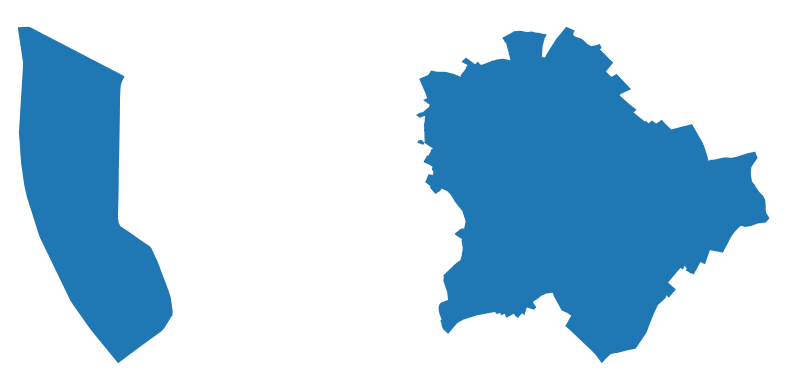

In [167]:
admin_district = ox.geocode_to_gdf('5th District, Budapest')
admin_city = ox.geocode_to_gdf('Budapest')

f,ax = plt.subplots(1,2,figsize=(12,4))

admin_district.plot(ax=ax[0])
admin_city.plot(ax=ax[1])

for aax in ax: aax.axis("off")

plt.tight_layout()

#### Combine the map

(19.041035315, 19.062748985000002, 47.48433755, 47.51619465)

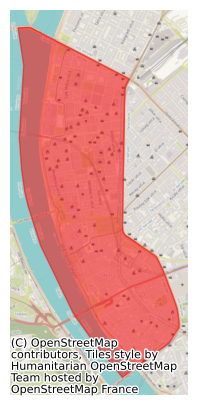

In [171]:
f, ax = plt.subplots(1,1, figsize=(5,5))

# admin_city.plot(ax=ax, color='none', edgecolor='k',linewidth=1.5)
# # Comment this above line to have the closer look 

admin_district.plot(ax=ax, color='red', alpha = 0.5)
admin_district.plot(ax=ax, color = 'none', edgecolor='r',alpha=0.5)

# add base map
ctx.add_basemap(ax, crs = admin_city.crs, url = ctx.providers.Esri.WorldTopoMap)

ax.axis('off')


(19.041035315, 19.062748985000002, 47.48433755, 47.51619465)

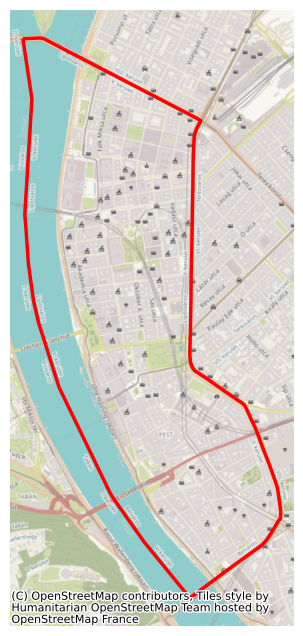

In [177]:
# Favourite basemap

f1, ax1 = plt.subplots(1,1, figsize=(8,8))

# admin_city.plot(ax=ax, color='none', edgecolor='k',linewidth=1.5)
# # Comment this above line to have the closer look 

# admin_district.plot(ax=ax, color='red', alpha = 0.5)
admin_district.plot(ax=ax1, color = 'none', edgecolor='r',linewidth=2.5)

# add base map
ctx.add_basemap(ax1, crs = admin_city.crs, url = ctx.providers.CartoDB.DarkMatter)

ax1.axis('off')


It should be the dark map instead of the normal one => Debug!!!

## Downloading and Visualizing a full urban profile of city neighborhoods

### Data collection

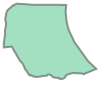

In [181]:
ad_dist = ox.geocode_to_gdf('1st district, Budapest')
ad_pol = ad_dist.geometry.to_list()[0]
ad_pol

In [183]:
ad_dist

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((19.02376 47.49562, 19.02376 47.49555...",19.023759,47.485671,19.051307,47.508074,59645797,relation,221984,47.499163,19.035143,boundary,administrative,18,0.459212,borough,1st district,"1st district, Budapest, Central Hungary, Hungary"
